In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Using scipy.io.wavfile

In [2]:
import scipy.io.wavfile

In [3]:
sample_rate, data= scipy.io.wavfile.read('es01.wav')
length = data.shape[0] / sample_rate
time = np.linspace(0., length, data.shape[0])
print(f"length = {length}s")
print(f"len data = {len(data)}")
print(f"sample rate = {sample_rate}")

length = 10.734s
len data = 343488
sample rate = 32000


In [237]:
# source
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

#### Normalization:

* s_mean=s(n)-s_mean, with s_mean=mean(data)
* max_signal=max(s_mean)
* normalized_signal=s_mean/max_signal

In [4]:
mean_db=np.mean(data)
data_mean=data-mean_db
max_signal=max(data_mean)
data_normalized=data_mean/max_signal

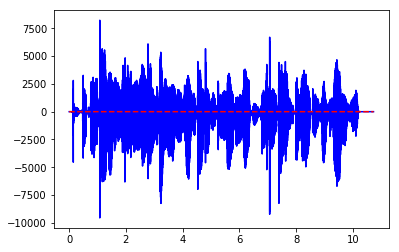

In [6]:
# data
plt.plot(time,data,'-b',time,data_normalized,'--r')
# plt.plot(time,data,'-b',time,data_normalized,'--r')

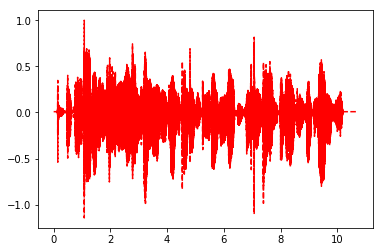

In [7]:
plt.plot(time,data_normalized,'--r')

# Using scipy.fftpack Slide 28

In [8]:
from scipy.fftpack import fft

##### Here I try to calculate the dt manually:
* Calculationg fftfreq ==> we need signal.size and dt
* in our case signal.size=y.size
* and dt=?
* T=N*dt
* N=number of sampling points
* Could we calculate N using sr? ==> N=sr*T
* ==> dt=1/sr ?

In [9]:
dt=1/sr
dt*100
# ==> It does not work

NameError: name 'sr' is not defined

[ 0.          0.00332679  0.00665358 ... -0.00998037 -0.00665358
 -0.00332679]


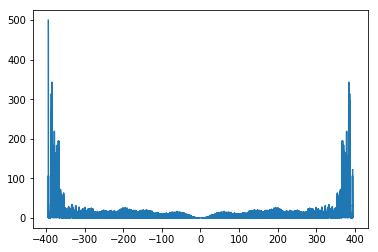

In [139]:
# freq=scipy.fftpack.fftfreq(y.size,d=1/sr)
freq=scipy.fftpack.fftfreq(y.size,d=0.00127)
print(freq)
freq_center=scipy.fftpack.fftshift(freq)
y_fft=scipy.fftpack.fft(y)
plt.plot(freq_center,np.abs(y_fft))

In [183]:
print(len(freq_calc))
print(len(y))

236685
236685


In [298]:
dt=236800/1851

127.93084819016748

In [201]:
# Here I try to calculate the dt manually, but I don't understand why the length of time array is 1851
time_calc=np.linspace(0,236800,num=1851)
dt=time_calc[-1]-time_calc[-2]
freq_calc=scipy.fftpack.fftfreq(y.size,dt/100000)

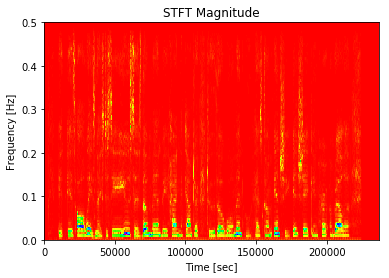

In [243]:
freq,time_,y_stft=scipy.signal.stft(y)
plt.pcolormesh(time_, freq, np.abs(y_stft),cmap=plt.cm.hsv)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Using pylab slide 28

In [194]:
import pylab

22050


C:\Users\Hanane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5,1,'specgram plot')

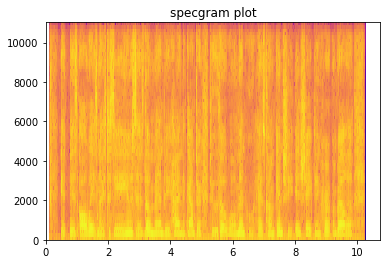

In [206]:
y, sr = librosa.load('es01.wav')
print(sr)
overlap_frac = 0
data, freqs, bins, im = pylab.specgram(y, NFFT=128, Fs=sr, noverlap = 128*overlap_frac, cmap='plasma')
plt.title("specgram plot")

# Using librosa

In [3]:
# from __future__ import print_function
# import librosa

# # 1. Get the file path to the included audio example
# filename = librosa.util.example_audio_file()

# # 2. Load the audio as a waveform `y`
# #    Store the sampling rate as `sr`
# y, sr = librosa.load(filename)

# from # 3. Run the default beat tracker
# tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# # 4. Convert the frame indices of beat events into timestamps
# beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [40]:
import librosa.display

In [52]:
y, sr = librosa.load('es01.wav')
Y_stft = librosa.stft(y)
print(Y_stft.shape)
Y_stft

(1025, 463)


array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
      dtype=complex64)

In [184]:
# np.fft.fft(y)#.shape

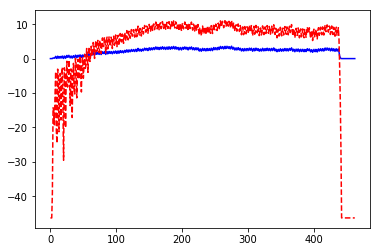

In [190]:
plt.plot(abs(Y_stft)[0],'-b',Y_db[0],'--r')

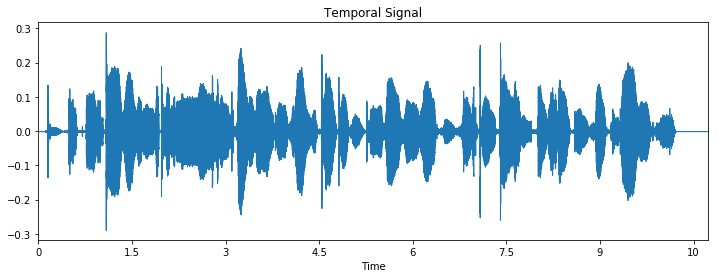

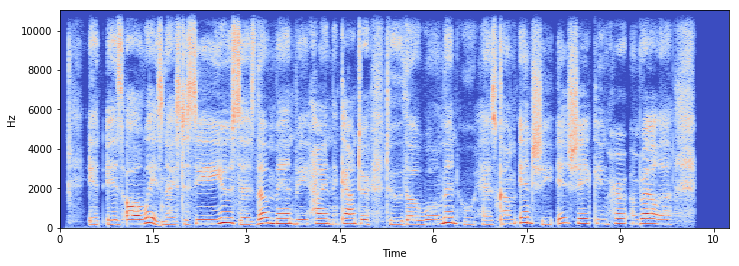

Text(0.5,1,'Spectogram')

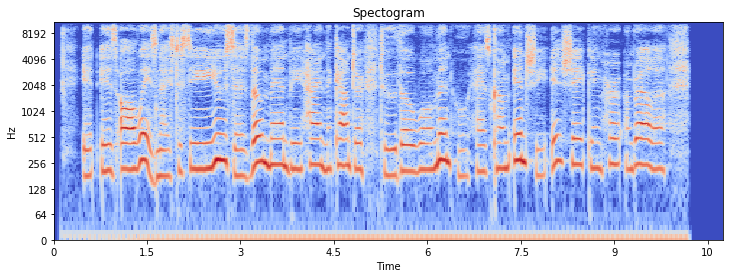

In [185]:
y, sr = librosa.load('es01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr=sr)
plt.title("Temporal Signal")
# pour le spectrogramme
Y_stft = librosa.stft(y)
Y_db = librosa.amplitude_to_db(abs(Y_stft))#abs(complex_number)=np.sqrt(a^2+b^2)
# D_left = np.abs(librosa.stft(y, center=False))
# Y_db = librosa.amplitude_to_db(abs(Y_stft))

plt.figure(figsize=(12, 4))
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='hz')
plt.show()
plt.figure(figsize=(12, 4))
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram')

In [11]:
import numpy as np

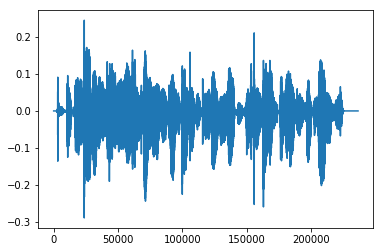

In [34]:
y, sr = librosa.load('es01.wav')
x=np.arange(0,len(y))
plt.plot(x,y)

In [37]:
y_ftt=fft(y)
y_ftt

array([-499.74268  +0.j      ,  117.17789 -33.532093j,
         40.396053-45.42403j , ...,   22.197529+20.268469j,
         40.396053+45.42403j ,  117.17789 +33.532093j], dtype=complex64)

C:\Users\Hanane\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


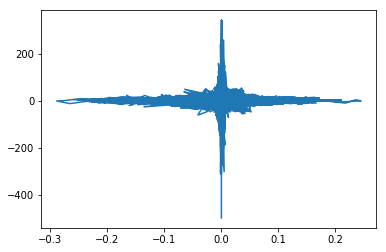

In [38]:
plt.plot(y,y_ftt)

# DCT using scipy

In [295]:
# https://www.sciencedirect.com/science/article/abs/pii/S0031320309004142

In [296]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html
scipy.fftpack.fft(np.array([4., 3., 5., 10., 5., 3.])).real
scipy.fftpack.dct(np.array([4., 3., 5., 10.]), 1)
# Type 1 and fft are equivalent (not the same lenght)

array([30., -8.,  6., -2.])

In [291]:
#### TYPE 1 DCT
def calc_dct_type1(k,x,N):
    cos_array=[np.cos(np.pi*k*n/(N-1)) for n in range(1,N-1)]
    vect_cos=x[1:N-1]*cos_array
    y_k=x[0]+(-1)**k*x[N-1]+2*sum(vect_cos)
    return y_k

x=np.array([4., 3., 5., 10.])
N=len(x)
dct_res=[]
for k in range(0,N):
    dct_res.append(round(calc_dct_type1(k,x,N),0))
dct_res

In [293]:
#### TYPE 2 DCT
def calc_dct_type2(k,x,N):
    cos_array=[np.cos(np.pi*k*(2*n+1)/(2*N)) for n in range(0,N)]
#     print("len cos_array",len(cos_array))
    vect_cos=x*cos_array
#     print("len vect_cos",len(vect_cos))
    y_k=2*sum(vect_cos)
    return y_k

x=np.array([4., 3., 5., 10.])
N=len(x)
dct_res=[]
for k in range(0,N):
    dct_res.append(round(calc_dct_type2(k,x,N),0))
dct_res